# PLOTAGEM DOS GRÁFICOS EM PAIR PLOT

## Anotações

- ''

## Preparando o ambiente

In [104]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# pd.set_option('display.max_rows', None)

In [5]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')

Todas as métricas numéricas, PairGrid:

- Score
- GDP
- Social support
- HLE
- Freedom
- Generosity
- Corruption
- Positive affect
- Negative affect

### AO LONGO DO TEMPO

In [ ]:

data_to_plot = dataset[dataset['year']>2005]

fig, axes = plt.subplots(3, 3, figsize=(25, 10))

fig.suptitle(
  t='Ao longo do tempo',
  fontsize=32
)


sns.lineplot(ax=axes[0, 0], data=data_to_plot, x='year', y='score')
axes[0, 0].set_ylabel('Score', fontsize=20)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylim(0, 10)

sns.lineplot(ax=axes[0, 1], data=data_to_plot, x='year', y='gdp')
axes[0, 1].set_ylabel('GDP', fontsize=20)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylim(0, 10)

sns.lineplot(ax=axes[0, 2], data=data_to_plot, x='year', y='social_support')
axes[0, 2].set_ylabel('Social support', fontsize=20)
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylim(0, 1)

sns.lineplot(ax=axes[1, 0], data=data_to_plot, x='year', y='hle')
axes[1, 0].set_ylabel('HLE', fontsize=20)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylim(0, 10)

sns.lineplot(ax=axes[1, 1], data=data_to_plot, x='year', y='freedom')
axes[1, 1].set_ylabel('Freedom', fontsize=20)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylim(0, 1)

sns.lineplot(ax=axes[1, 2], data=data_to_plot, x='year', y='generosity')
axes[1, 2].set_ylabel('Generosity', fontsize=20)
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylim(0, 1)

sns.lineplot(ax=axes[2, 0], data=data_to_plot, x='year', y='corruption')
axes[2, 0].set_ylabel('Corruption', fontsize=20)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylim(0, 1)

sns.lineplot(ax=axes[2, 1], data=data_to_plot, x='year', y='positive_affect')
axes[2, 1].set_ylabel('Positive affect', fontsize=20)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylim(0, 1)

sns.lineplot(ax=axes[2, 2], data=data_to_plot, x='year', y='negative_affect')
axes[2, 2].set_ylabel('Negative affect', fontsize=20)
axes[2, 2].set_xlabel('')
axes[2, 2].set_ylim(0, 1)


Text(0.5, 0, 'Frequência')

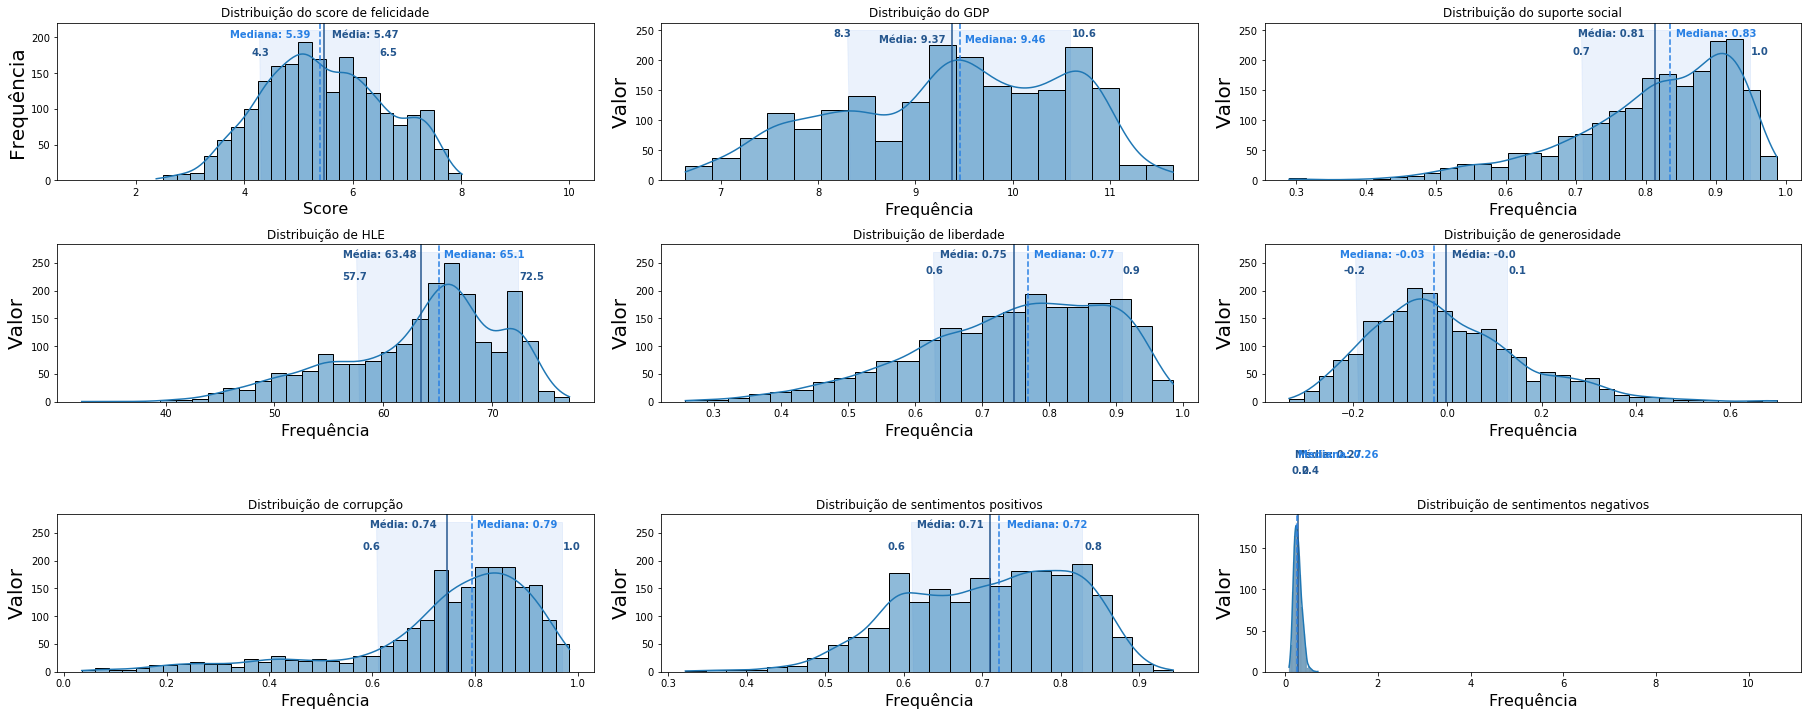

In [160]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10), constrained_layout=True)

fig.suptitle(
  t='',
  fontsize=32
)

# DISTRIBUIÇÃO DO SCORE DE FELICIDADE
ax = sns.histplot(ax=axes[0, 0], data=dataset['score'], binrange=(1,10), kde=True)

rounded_mean = round(np.mean(dataset['score']), 2)
rounded_median = round(np.median(dataset['score']), 2)
rounded_std = round(np.std(dataset['score']), 2)
lower_std = rounded_median - rounded_std
upper_std = rounded_median + rounded_std

axes[0, 0].axvline(x=np.mean(dataset['score']), color='#24568E')
axes[0, 0].text(np.mean(dataset['score']) + 0.15, 200, f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[0, 0].axvline(x=np.median(dataset['score']), color='#2880E4', linestyle='--')
axes[0, 0].text(np.median(dataset['score']) - 1.65,200,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
axes[0, 0].text(lower_std - 0.15, 175,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
axes[0, 0].text(upper_std, 175,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [210],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[0, 0].title.set_text('Distribuição do score de felicidade')
axes[0, 0].set_ylabel('Frequência', fontsize=20)
axes[0, 0].set_xlabel('Score', fontsize=16)

# DISTRIBUIÇÃO DO GDP

ax = sns.histplot(ax=axes[0, 1], data=dataset['gdp'], kde=True)

rounded_mean = round(np.mean(dataset['gdp']), 2)
rounded_median = round(np.median(dataset['gdp']), 2)
rounded_std = round(np.std(dataset['gdp']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[0, 1].axvline(x=np.mean(dataset['gdp']), color='#24568E')
axes[0, 1].text(np.mean(dataset['gdp']) - 0.75,230,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[0, 1].axvline(x=np.median(dataset['gdp']), color='#2880E4', linestyle='--')
axes[0, 1].text(np.median(dataset['gdp']) + 0.05,230,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
axes[0, 1].text(lower_std - 0.15, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
axes[0, 1].text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [250],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[0, 1].title.set_text('Distribuição do GDP')
axes[0, 1].set_ylabel('Valor', fontsize=20)
axes[0, 1].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO SOCIAL SUPPORT

ax = sns.histplot(ax=axes[0,2], data=dataset['social_support'], kde=True)

rounded_mean = round(np.mean(dataset['social_support']), 2)
rounded_median = round(np.median(dataset['social_support']), 2)
rounded_std = round(np.std(dataset['social_support']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[0, 2].axvline(x=np.mean(dataset['social_support']), color='#24568E')
axes[0, 2].text(np.mean(dataset['social_support']) - 0.11,240,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[0, 2].axvline(x=np.median(dataset['social_support']), color='#2880E4', linestyle='--')
axes[0, 2].text(np.median(dataset['social_support']) + 0.009,240,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[0, 2].axvline(x=lower_std,color='#B3CEF700')
axes[0, 2].text(lower_std - 0.015, 210,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[0, 2].axvline(x=upper_std,color='#B3CEF700')
axes[0, 2].text(upper_std, 210,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [250],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[0, 2].title.set_text('Distribuição do suporte social')
axes[0, 2].set_ylabel('Valor', fontsize=20)
axes[0, 2].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO HLE

ax = sns.histplot(ax=axes[1,0], data=dataset['hle'], kde=True)

rounded_mean = round(np.mean(dataset['hle']), 2)
rounded_median = round(np.median(dataset['hle']), 2)
rounded_std = round(np.std(dataset['hle']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[1, 0].axvline(x=np.mean(dataset['hle']), color='#24568E')
axes[1, 0].text(np.mean(dataset['hle']) - 7.2, 260, f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[1, 0].axvline(x=np.median(dataset['hle']), color='#2880E4', linestyle='--')
axes[1, 0].text(np.median(dataset['hle']) + 0.5,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[1, 0].axvline(x=lower_std,color='#B3CEF700')
axes[1, 0].text(lower_std - 1.5, 220,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[1, 0].axvline(x=upper_std,color='#B3CEF700')
axes[1, 0].text(upper_std, 220,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[1, 0].title.set_text('Distribuição de HLE')
axes[1, 0].set_ylabel('Valor', fontsize=20)
axes[1, 0].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO FREEDOM

ax = sns.histplot(ax=axes[1,1], data=dataset['freedom'], kde=True)

rounded_mean = round(np.mean(dataset['freedom']), 2)
rounded_median = round(np.median(dataset['freedom']), 2)
rounded_std = round(np.std(dataset['freedom']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[1,1].axvline(x=np.mean(dataset['freedom']), color='#24568E')
axes[1,1].text(np.mean(dataset['freedom']) - 0.11, 260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[1,1].axvline(x=np.median(dataset['freedom']), color='#2880E4', linestyle='--')
axes[1,1].text(np.median(dataset['freedom']) + 0.009, 260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[1,1].axvline(x=lower_std,color='#B3CEF700')
axes[1,1].text(lower_std - 0.015, 230,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[1,1].axvline(x=upper_std,color='#B3CEF700')
axes[1,1].text(upper_std, 230,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[1, 1].title.set_text('Distribuição de liberdade')
axes[1, 1].set_ylabel('Valor', fontsize=20)
axes[1, 1].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO GENEROSITY

ax = sns.histplot(ax=axes[1, 2], data=dataset['generosity'], kde=True)

rounded_mean = round(np.mean(dataset['generosity']), 2)
rounded_median = round(np.median(dataset['generosity']), 2)
rounded_std = round(np.std(dataset['generosity']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[1, 2].axvline(x=np.mean(dataset['generosity']), color='#24568E')
axes[1, 2].text(np.mean(dataset['generosity']) + 0.0125,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[1, 2].axvline(x=np.median(dataset['generosity']), color='#2880E4', linestyle='--')
axes[1, 2].text(np.median(dataset['generosity']) - 0.2, 260, f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[1, 2].axvline(x=lower_std,color='#B3CEF700')
axes[1, 2].text(lower_std - 0.03, 230, str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[1, 2].axvline(x=upper_std,color='#B3CEF700')
axes[1, 2].text(upper_std, 230, str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[1, 2].title.set_text('Distribuição de generosidade')
axes[1, 2].set_ylabel('Valor', fontsize=20)
axes[1, 2].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO CORRUPTION

ax = sns.histplot(ax=axes[2,0], data=dataset['corruption'], kde=True)

rounded_mean = round(np.mean(dataset['corruption']), 2)
rounded_median = round(np.median(dataset['corruption']), 2)
rounded_std = round(np.std(dataset['corruption']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[2,0].axvline(x=np.mean(dataset['corruption']), color='#24568E')
axes[2,0].text(np.mean(dataset['corruption']) - 0.15,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[2,0].axvline(x=np.median(dataset['corruption']), color='#2880E4', linestyle='--')
axes[2,0].text(np.median(dataset['corruption']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[2,0].axvline(x=lower_std,color='#B3CEF700')
axes[2,0].text(lower_std - 0.03, 220, str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[2,0].axvline(x=upper_std,color='#B3CEF700')
axes[2,0].text(upper_std, 220, str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[2, 0].title.set_text('Distribuição de corrupção')
axes[2, 0].set_ylabel('Valor', fontsize=20)
axes[2, 0].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO POSITIVE AFFECT

ax = sns.histplot(ax=axes[2,1], data=dataset['positive_affect'], kde=True)

rounded_mean = round(np.mean(dataset['positive_affect']), 2)
rounded_median = round(np.median(dataset['positive_affect']), 2)
rounded_std = round(np.std(dataset['positive_affect']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[2,1].axvline(x=np.mean(dataset['positive_affect']), color='#24568E')
axes[2,1].text(np.mean(dataset['positive_affect']) - 0.093, 260, f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[2,1].axvline(x=np.median(dataset['positive_affect']), color='#2880E4', linestyle='--')
axes[2,1].text(np.median(dataset['positive_affect']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[2,1].axvline(x=lower_std,color='#B3CEF700')
axes[2,1].text(lower_std - 0.03, 220, str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[2,1].axvline(x=upper_std,color='#B3CEF700')
axes[2,1].text(upper_std, 220, str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

axes[2, 1].title.set_text('Distribuição de sentimentos positivos')
axes[2, 1].set_ylabel('Valor', fontsize=20)
axes[2, 1].set_xlabel('Frequência', fontsize=16)

# DISTRIBUIÇÃO NEGATIVE AFFECT

ax = sns.histplot(ax=axes[2, 2], data=dataset['negative_affect'], kde=True)

rounded_mean = round(np.mean(dataset['negative_affect']), 2)
rounded_median = round(np.median(dataset['negative_affect']), 2)
rounded_std = round(np.std(dataset['negative_affect']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

axes[2, 2].axvline(x=np.mean(dataset['negative_affect']), color='#24568E')
axes[2, 2].text(np.mean(dataset['negative_affect']) - 0.065,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
axes[2, 2].axvline(x=np.median(dataset['negative_affect']), color='#2880E4', linestyle='--')
axes[2, 2].text(np.median(dataset['negative_affect']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = axes[2, 2].axvline(x=lower_std,color='#B3CEF700')
axes[2, 2].text(lower_std - 0.03, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = axes[2, 2].axvline(x=upper_std,color='#B3CEF700')
axes[2, 2].text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')

# axes[2, 2].set_xlim(0.1, 0.8)

axes[2, 2].title.set_text('Distribuição de sentimentos negativos')
axes[2, 2].set_ylabel('Valor', fontsize=20)
axes[2, 2].set_xlabel('Frequência', fontsize=16)